In [1]:
#Importing all of the packages needed for this ICP
import numpy
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Importing the training and testing data of CIFAR10, converting it to the float data type, normalizing the data, finding the number of classes, and converting the response variable to categorical.

In [36]:
seed = 7
numpy.random.seed(seed)
#Loading CIFAR10 dataset into train/test
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Normalizing
X_train = X_train / 255.0
X_test = X_test / 255.0
#Converting response variable to categorical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Fixing the error of the initial CNN model

In [25]:
model = Sequential()
#Error with input_shape - had (3,32,32) instead of (32,32,3)
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Training and evaluating the initial CNN model

In [26]:
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_10 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               4194816   
                                                      

Overall accuracy of the initial CNN model is approximately 70%

Creating the new CNN model with the necessary changes listed in the ICP directions

In [7]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))

In [24]:
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model2.summary())
# Fit the model
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 64)        0         
                                                      

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/25
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7589 - accuracy: 0.7319 - val_loss: 0.6996 - val_accuracy: 0.7594
Epoch 2/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5800 - accuracy: 0.7963 - val_loss: 0.6367 - val_accuracy: 0.7769
Epoch 3/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4784 - accuracy: 0.8312 - val_loss: 0.6002 - val_accuracy: 0.7979
Epoch 4/25
1563/1563 [==============================] - 13s 9ms/step - loss: 0.4020 - accuracy: 0.8558 - val_loss: 0.6204 - val_accuracy: 0.7979
Epoch 5/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3572 - accuracy: 0.8727 - val_loss: 0.6065 - val_accuracy: 0.8003
Epoch 6/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3160 - accuracy: 0.8875 - val_loss: 0.6081 - val_accuracy: 0.8086
Epoch 7/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2778 - accuracy: 0.9013 - val_loss: 0.6234 - v

The accuracy of the new CNN model is approximately 82%.

This is a good improvement from the initial model, around a 12% increase in the accuracy of the image classification task.

Predicting what the first 4 images of the test dataset are with the new CNN model.

Here is the label name key:

airplane : 0

automobile : 1

bird : 2

cat : 3

deer : 4

dog : 5

frog : 6

horse : 7

ship : 8

truck : 9

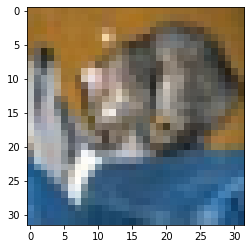

1/1 [==============================] - 0s 26ms/step
Predicted Class:  3
Actual Class:  3


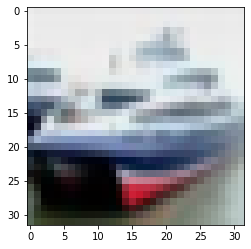

1/1 [==============================] - 0s 23ms/step
Predicted Class:  8
Actual Class:  8


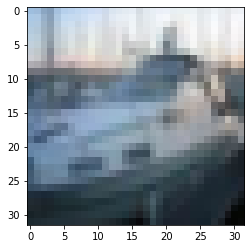

1/1 [==============================] - 0s 25ms/step
Predicted Class:  8
Actual Class:  8


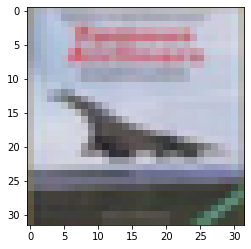

1/1 [==============================] - 0s 22ms/step
Predicted Class:  0
Actual Class:  0


In [52]:
for i in range(0,4):
  plt.imshow(X_test[i])
  plt.show()
  pred = model.predict(X_test[i].reshape(1,32,32,3))
  print('Predicted Class: ',pred.argmax())
  print('Actual Class: ',y_test[i].argmax())

The new CNN model predicted each of the first 4 images correctly as you can see above.

Visualizing the loss and accuracy of the newly created CNN model

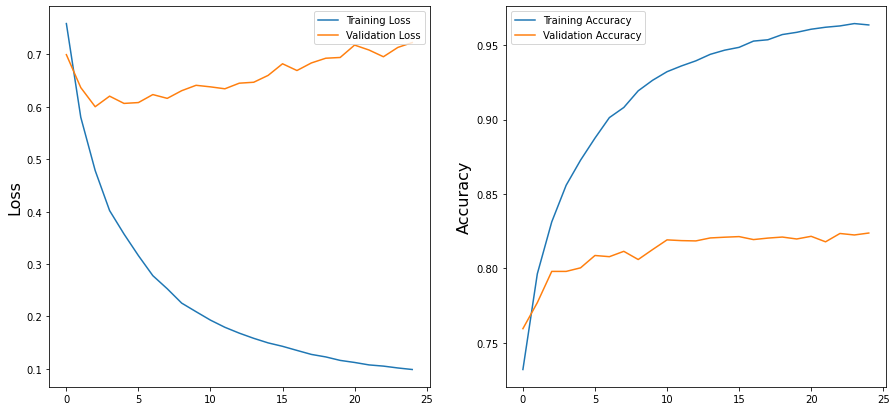

In [27]:
plt.figure(figsize = (15,7))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize = 16)
plt.plot(history2.history['loss'], label = 'Training Loss')
plt.plot(history2.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize = 16)
plt.plot(history2.history['accuracy'], label = 'Training Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.show()

Based on the loss and accuracy training & validation plots shown above, we can see that we may be overfitting our model here. This may be able to be fixed slightly by using some sort of earlystopping within our model.